In [135]:
import numpy as np
import matplotlib.pyplot as plt

# Data on orbit
mu = 3.986004418e14
a = 6371e3 + 700e3
period = 2 * np.pi * np.sqrt(a**3/mu)
n = 2 * np.pi / period

class Simulation:
    
    def __init__(self, state_history, state_history_m = True, control_torque = True, estimations = True):
        
        self.state_history = np.loadtxt(CASE_PATH + 'state_history.dat')
        
        if state_history_m:
            self.state_history_m = np.loadtxt(CASE_PATH + 'measurements.dat')
            
        if control_torque:
            self.control_torque = np.loadtxt(CASE_PATH + 'control_torque.dat')
            
        if estimations: 
            self.state_estimations = np.loadtxt(CASE_PATH + 'state_history_e.dat')
            self.bias_estimations = np.loadtxt(CASE_PATH + 'bias_history_e.dat')
            self.covariance_estimations = np.load(CASE_PATH + 'covariance_history_e.npy') 
            

CASE_PATH = 'output/Q8/attempt1/'
S = Simulation(CASE_PATH)

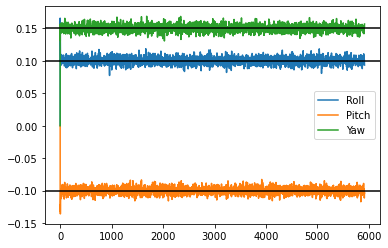

In [136]:
plt.plot(S.bias_estimations[:,0], np.rad2deg(S.bias_estimations[:,1]), label = "Roll")
plt.plot(S.bias_estimations[:,0], np.rad2deg(S.bias_estimations[:,2]), label = "Pitch")
plt.plot(S.bias_estimations[:,0], np.rad2deg(S.bias_estimations[:,3]), label = "Yaw")
plt.legend() 

#plt.xlim(0, 500), 
plt.axhline(0.1, color= 'k')
plt.axhline(-0.1, color= 'k')
plt.axhline(0.15, color= 'k') 

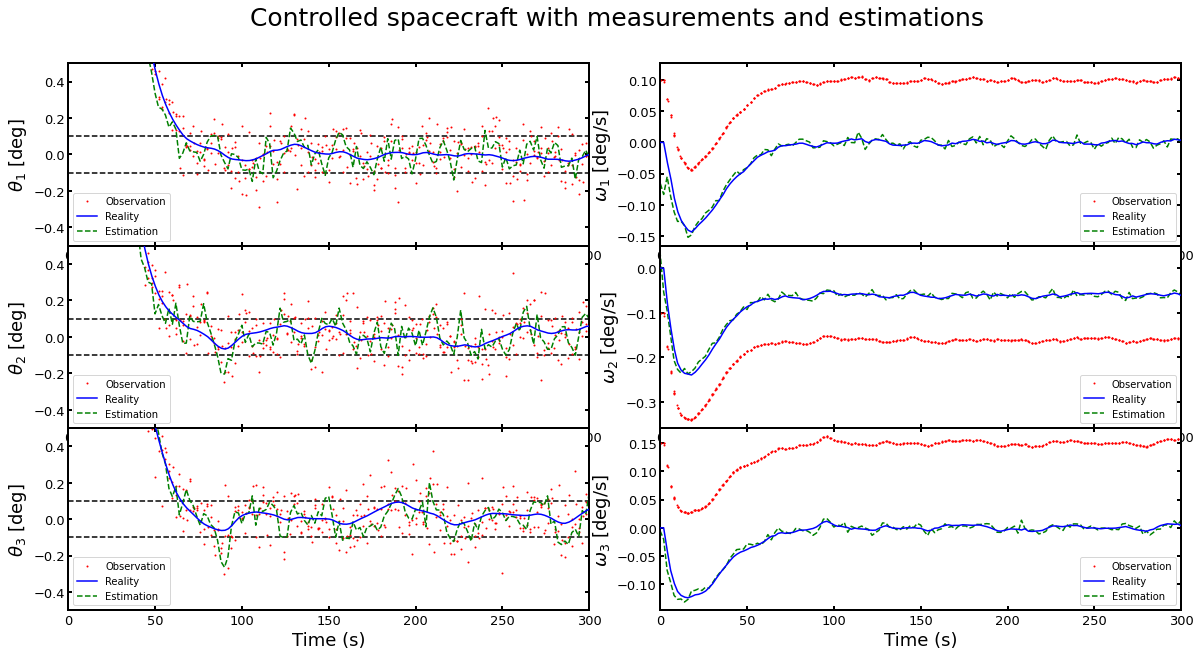

In [137]:
labels = [r"$\theta_1$ [deg]", r"$\theta_2$ [deg]", r"$\theta_3$ [deg]",
          "$\omega_1$ [deg/s]", "$\omega_2$ [deg/s]", "$\omega_3$ [deg/s]"]

fig, axes = plt.subplots(3, 2, figsize = (17, 9))
fig.tight_layout(pad=4)
fig.suptitle("Controlled spacecraft with measurements and estimations" % period, fontsize = 25, y = 1.02)
fig.subplots_adjust(hspace=0)
axes[2, 0].set_xlabel("Time (s)", fontsize = 18)
axes[2, 1].set_xlabel("Time (s)", fontsize = 18)

for ax in axes[:,0]:
#     ax.set_xlim(0, 200)
#     ax.set_ylim(-5, 6)

    ax.set_xlim(0, 300)
    ax.set_ylim(-0.5, 0.5)
    ax.axhline(0.1, color = 'k', linestyle = '--') 
    ax.axhline(-0.1, color = 'k', linestyle = '--') 
    
for ax in axes[:,1]:
    ax.set_xlim(0, 300)
    
for i, ax in enumerate(axes.T.flat): 
    
    ax.plot(S.state_history_m[:,0], np.rad2deg(S.state_history_m[:,1+i]), 'ro', markersize = 1, label = "Observation")
    ax.plot(S.state_history[:,0], np.rad2deg(S.state_history[:,1+i]), 'b-', markersize = 1, label = "Reality", zorder = 1000)
    ax.plot(S.state_estimations[:,0], np.rad2deg(S.state_estimations[:,1+i]), 'g--', label = "Estimation")
                                            
    ax.set_ylabel(labels[i], fontsize = 18) 
    #ax.axvline(81)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(labelsize=13)
    ax.tick_params(axis="both",direction="in",which="both", length=4, width = 2)
    ax.tick_params(bottom=True, top=True, left=True, right=True)
    ax.legend()

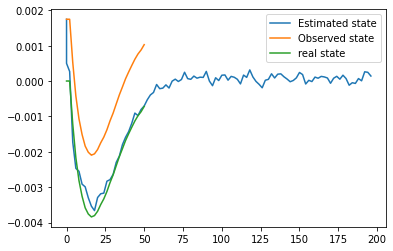

In [121]:
plt.plot(S.state_estimations[:100,0], S.state_estimations[:100,4], label = "Estimated state")
plt.plot(S.state_history_m[:100,0], S.state_history_m[:100,4], label = "Observed state")
plt.plot(S.state_history[:100,0], S.state_history[:100,4], label = "real state")
plt.legend()

In [ ]:
plt.hist(S.